In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
data = pd.read_csv( 'Admission_Predict_Ver1.1.csv' )
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [34]:
continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'] ].values/100 # division to 100 is probably to reduce the range of the data
categorical_research_features = data[ [ 'Research' ] ].values

In [41]:
X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 )
Y = data[ [ 'Chance of Admit ' ] ].values

In [42]:
train_features , test_features ,train_labels, test_labels = train_test_split( X , Y , test_size=0.2 )

In [58]:
X = tf.constant( train_features , dtype=tf.float32 )
Y = tf.constant( train_labels , dtype=tf.float32 )

test_X = tf.constant( test_features , dtype=tf.float32 ) 
test_Y = tf.constant( test_labels , dtype=tf.float32 )

In [92]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )
    
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

In [109]:
num_epochs = 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001

dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

In [110]:
num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) )

Loss is 1.1743050813674927
Loss is 0.5689347982406616
Loss is 0.2791033983230591
Loss is 0.14017733931541443
Loss is 0.0738828107714653
Loss is 0.042206186801195145
Loss is 0.02713387832045555
Loss is 0.01994999125599861
Loss is 0.01652519777417183
Loss is 0.014901222661137581


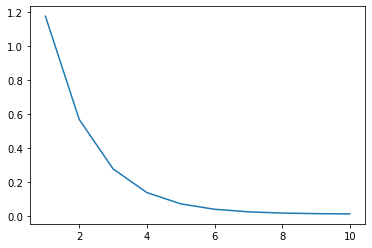

In [111]:
import matplotlib.pyplot as plt
plt.plot( epochs_plot , loss_plot ) 
plt.show()

In [105]:
output = h( test_X , weights , bias ) 
labels = test_Y

accuracy_op = tf.metrics.MeanAbsoluteError() 
accuracy_op.update_state( labels , output )
print( 'Mean Absolute Error = {}'.format( accuracy_op.result().numpy() ) )

Mean Absolute Error = 0.2868417799472809


In [113]:
print(weights)

tf.Tensor(
[[-0.32330167]
 [ 1.3004154 ]
 [-1.0365405 ]
 [-1.1577468 ]
 [ 0.64099586]
 [-0.3744952 ]
 [ 0.23010904]], shape=(7, 1), dtype=float32)
